In [ ]:
!pip install -q kaggle
from google.colab import files

files.upload()


In [ ]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
cd /content

/content


In [6]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-13 10:04:34            345  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            366  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            292  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            136  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [7]:
!kaggle competitions download -c fcis-cs-deeplearningcompetition

 87% 136M/157M [00:02<00:00, 59.5MB/s]
100% 157M/157M [00:02<00:00, 70.8MB/s]
  0% 0.00/10.0 [00:00<?, ?B/s]
100% 10.0/10.0 [00:00<00:00, 9.03kB/s]
 99% 558M/563M [00:05<00:00, 150MB/s]
100% 563M/563M [00:05<00:00, 106MB/s]
  0% 0.00/8.26k [00:00<?, ?B/s]
100% 8.26k/8.26k [00:00<00:00, 7.46MB/s]


In [8]:
#!mkdir train
#!mkdir test
#!unrar x /content/train.rar -d /content/train/
!unrar x /content/test.rar -d /content/test/


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/test.rar

Creating    /content/test                                             OK
Creating    /content/test/test                                        OK
Extracting  /content/test/test/003_1b.jpg                                  0%  OK 
Extracting  /content/test/test/0310_piscines_8.jpg                         0%  OK 
Extracting  /content/test/test/051011Greenhouse.jpg                        0%  OK 
Extracting  /content/test/test/100_1238.jpg                                0%  OK 
Extracting  /content/test/test/1164876979_0.jpg                            0%  OK 
Extracting  /content/test/test/1208_hall_entrada_010.jpg                   0%  OK 
Extracting  /content/test/test/12_t1_H_S_Pool_Inside.jpg                   0%  OK 
Extracting  /content/test/test/13_2o_andar_panorama.jpg                    0%  OK 
Extracting  /c

In [1]:
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/indoorTrain.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [9]:
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, SGD
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
from keras.layers import Input
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from tensorflow.python.keras import regularizers

IC=[]
for d in os.listdir('/content/train'):
  c=0
  P=os.path.join('/content/train',d)
  for i in os.listdir(P):
    #print(i)
    c+=1
  IC.append([d,c])
print(IC)

[['bakery', 405], ['toystore', 554], ['kitchen', 588], ['bedroom', 530], ['poolinside', 524], ['greenhouse', 405], ['restaurant', 411], ['airport_inside', 487], ['operating_room', 460], ['gym', 444]]


In [12]:
Num=0
for i in IC:
  Num+=i[1]
print(Num)

4808


In [ ]:
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave
import cv2
import imutils
from scipy import ndimage
from scipy import misc
import os
import imgaug.augmenters as iaa

def Aug1(class_name):

  c=0
  for IM in os.listdir('/content/train/train/'+class_name):
    img = cv2.imread("/content/train/train/"+class_name+'/'+IM)
    if img is None:
      print('none')
      os.remove("/content/train/train/"+class_name+'/'+IM)
    else:
      if c%2==0: #using different 2 aug. based on index
        # Use Flip code 1 to flip horizontally 
        img = cv2.flip(img, 1) 
        alpha = 1 # Contrast control (1.0-3.0)
        beta = 50 # Brightness control (0-100)
        img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
        imsave("/content/train/train/"+class_name+'/'+IM+'Aug1.jpeg', img)
      else:
        img = imutils.rotate(img, 20)
        alpha = 1 # Contrast control (1.0-3.0)
        beta = 30 # Brightness control (0-100)
        img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
        imsave("/content/train/train/"+class_name+'/'+IM+'Aug2.jpeg', img)
      print(IM)
      print(c)
    c+=1

In [ ]:
for IM in os.listdir('/content/train/train/operating_room/'):
  if 'Aug2' in IM or 'Aug1' in IM or 'Aug3' in IM or 'Aug4' in IM:
    os.remove("/content/train/train/operating_room/"+IM)

In [11]:
c=0
for IM in os.listdir('/content/train/kitchen/'):
  if c<=30:
    os.remove("/content/train/kitchen/"+IM)
    c+=1

In [ ]:
def Aug2(class_name):
  c=0
  for IM in os.listdir("/content/train/train/"+class_name):
    img = cv2.imread("/content/train/train/"+class_name+'/'+IM)
    if img is None:
      print('none')
      os.remove("/content/train/train/"+class_name+'/'+IM)
    else:
      if c%2==0: #using different 2 aug. based on index
        contrast=iaa.GammaContrast(gamma=2.0)
        contrast_image =contrast.augment_image(img)
        imsave("/content/train/train/"+class_name+'/'+IM+'Aug3.jpeg', contrast_image)
        #cv2_imshow(contrast_image)
      elif c%3==0:
        alpha = 1 # Contrast control (1.0-3.0)
        beta = 30 # Brightness control (0-100)
        img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
        imsave("/content/train/train/"+class_name+'/'+IM+'Aug5.jpeg', img)
      else:
        scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
        img =scale_im.augment_image(img)
        imsave("/content/train/train/"+class_name+'/'+IM+'Aug4.jpeg', img)
        print(IM)
        print(c)
    c+=1

In [ ]:
def Aug3(class_name):
  c=0
  for IM in os.listdir("/content/train/train/"+class_name):
    img = cv2.imread("/content/train/train/"+class_name+'/'+IM)
    if img is None:
      print('none')
      os.remove("/content/train/train/"+class_name+'/'+IM)
    else:
      if c%4==0: #using different 2 aug. based on index
        alpha = 1.5 # Contrast control (1.0-3.0)
        beta = 30 # Brightness control (0-100)
        img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
        scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
        img =scale_im.augment_image(img)
        imsave("/content/train/train/"+class_name+'/'+IM+'Aug6.jpeg', img)
    print(IM)
    print(c)
    c+=1


In [ ]:
Aug3('gym')

gimnasio_41_07_altavista.jpgAug1.jpeg
0
gimnasio_02_12_altavista.jpgAug1.jpeg
1
gym001.jpg
2
GymInt1.jpgAug2.jpeg
3
KoocanusaGym.jpgAug2.jpeg
4
gimnasio_35_23_flickr.jpg
5
gym_holiday_cottages.jpgAug1.jpeg
6
GYM_C.jpgAug1.jpeg
7
gimnasio_158_18_flickr.jpg
8
gimnasio_133_21_flickr.jpg
9
gimnasio_93_23_flickr.jpg
10
gimnasio_60_11_flickr.jpg
11
gimnasio_20_15_altavista.jpgAug2.jpeg
12
p1a.jpg
13
gimnasio_35_11_altavista.jpgAug2.jpeg
14
p1a.jpgAug1.jpeg
15
Gym_Equipment.jpg
16
gimnasio_134_13_flickr.jpgAug2.jpeg
17
gym04.jpgAug1.jpeg
18
Gym1_png.jpg
19
csu6.jpgAug2.jpeg
20
1852260398_75826537cd.jpg
21
gimnasio_07_17_altavista.jpg
22
Exercise_Gym.jpg
23
gym09.jpgAug2.jpeg
24
gym03.jpgAug2.jpeg
25
983000854_2bfd6a9ccf.jpgAug1.jpeg
26
DSC00139Gym1.jpgAug2.jpeg
27
gimnasio_98_14_flickr.jpgAug1.jpeg
28
room398.jpg
29
gimnasio_10_20_altavista.jpgAug1.jpeg
30
gimnasio_25_10_altavista.jpgAug1.jpeg
31
KoocanusaGym.jpg
32
gimnasio_19_09_altavista.jpgAug1.jpeg
33
gimnasio_46_02_altavista.jpgAug1.jpe

In [13]:
import random

Train=[]
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = image_name
    if word_label == 'airport_inside' or 'airport_inside' in word_label:
        return np.array([1,0,0,0,0,0,0,0,0,0])
    elif word_label == 'bakery' or 'bakery' in word_label:
        return np.array([0,1,0,0,0,0,0,0,0,0])
    elif word_label == 'bedroom' or 'bedroom' in word_label:
        return np.array([0,0,1,0,0,0,0,0,0,0])
    elif word_label == 'greenhouse' or 'greenhouse' in word_label:
        return np.array([0,0,0,1,0,0,0,0,0,0])
    elif word_label == 'gym' or 'gym' in word_label:
        return np.array([0,0,0,0,1,0,0,0,0,0])
    elif word_label == 'kitchen' or 'kitchen' in word_label:
        return np.array([0,0,0,0,0,1,0,0,0,0])
    elif word_label == 'operating_room' or 'operating_room' in word_label:
        return np.array([0,0,0,0,0,0,1,0,0,0])
    elif word_label == 'poolinside' or 'poolinside' in word_label:
        return np.array([0,0,0,0,0,0,0,1,0,0])
    elif word_label == 'restaurant' or 'restaurant' in word_label:
        return np.array([0,0,0,0,0,0,0,0,1,0])
    elif word_label == 'toystore' or 'toystore' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,1])

for N in os.listdir('/content/train'):
  L=create_label(N)
  print(L,N)
  c+=1
  for im in os.listdir("/content/train/"+N):
    Train.append(["/content/train/"+N+'/'+im,L])
print(len(Train))
random.shuffle(Train)

[0 1 0 0 0 0 0 0 0 0] bakery
[0 0 0 0 0 0 0 0 0 1] toystore
[0 0 0 0 0 1 0 0 0 0] kitchen
[0 0 1 0 0 0 0 0 0 0] bedroom
[0 0 0 0 0 0 0 1 0 0] poolinside
[0 0 0 1 0 0 0 0 0 0] greenhouse
[0 0 0 0 0 0 0 0 1 0] restaurant
[1 0 0 0 0 0 0 0 0 0] airport_inside
[0 0 0 0 0 0 1 0 0 0] operating_room
[0 0 0 0 1 0 0 0 0 0] gym
4777


In [14]:
from sklearn.model_selection import train_test_split
X=[]
Y=[]
for x,y in Train:
  X.append(x)
  Y.append(y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
import cv2
from keras.utils import to_categorical

def Tgenerator(data,labels,batch_size):
    #c=0
    while True:
      for start in range(0, len(data),batch_size):
          count = 0
          batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
          batch_labels = np.zeros((batch_size,10), dtype=np.float32)
          end = min(start + batch_size, len(data))
          for i in range(start, end):
            img_name = data[i]
            label = labels[i]
            #print(label)
            #print(label,img_name)
            # one hot encoding
            #encoded_label = to_categorical(label, num_classes=10)
            # read the image and resize
            img = cv2.imread(img_name)
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img]) #convert to 3 channels.
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = label
            count+=1
          yield  batch_data, batch_labels




In [16]:
from keras.utils import to_categorical

def Vgenerator(data,labels):
  X_Val=[]
  Y_Val=[]
  for i in range(len(data)):
    img_name = data[i]
    label = labels[i]

    img = cv2.imread(img_name)
    img = cv2.resize(img, (224,224))
    
    # check if it's grayscale
    if img.shape[2]==1:
        img = np.dstack([img, img, img]) #convert to 3 channels.
    
    # cv2 reads in BGR mode by default
    orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # normalize the image pixels
    orig_img = img.astype(np.float32)/255.
    
    X_Val.append(orig_img)
    Y_Val.append(label)
  return np.array(X_Val),np.array(Y_Val)
        

In [20]:
d,l=Tgenerator(X_test,y_test,16)
print(d[0],l[0])

[[[0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  ...
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]]

 [[0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  ...
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]]

 [[0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  ...
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]]

 ...

 [[0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  ...
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]]

 [[0.11764706 0.11764706 0.11764706]
  [0.11764706 0.11764706 0.11764706]


In [ ]:
from keras import backend as K
#define another metrices
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
import glob
import h5py
import shutil
import imgaug as aug
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import imgaug.augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras.applications import VGG19
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, SGD
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
from keras.layers import Input
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from tensorflow.python.keras import regularizers
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping


In [23]:

input_tensor = Input(shape=(224, 224, 3))
vgg_conv = VGG19(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)
# Freeze the layers except the last 2 layers
for layer in vgg_conv.layers[:-2]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
# Add the vgg convolutional base model
model.add(vgg_conv)
model.add(layers.Dropout(0.5))
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
#model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

#model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
#model.add(BatchNormalization())

#model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same')) 
#model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same')) #best without that 85
#model.add(MaxPooling2D((2,2)))



model.add(Flatten())
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.7))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))


80142336/80134624 [==============================] - 1s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f58d8d36a90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f58d7c86590> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f58d75a2b90> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f58d6d10f50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f58d7575a10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f58d6d20810> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f58c050d9d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f58c0510f90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f58c051a8d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f58c050db90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f58c0525f50> Fals

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 512)         0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 7, 7, 128)         70272     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               590336    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [25]:
opt = optimizers.Adam(lr=0.0001, decay=1e-5)
#es = EarlyStopping(patience=5)
#chkpt = ModelCheckpoint(filepath='indoorScenes', save_best_only=True, save_weights_only=True)
model.compile(loss='categorical_crossentropy', metrics=['acc'],optimizer=opt) 

In [26]:
batch_size = 32

# Get a train data generator
train_data_gen = Tgenerator(X_train, y_train,batch_size)
X_val,Y_val = Vgenerator(X_test, y_test)

# Define the number of training steps
steps = len(X_train)//batch_size
print(steps)

119


In [27]:
print(X_val.shape)
print(len(Y_val))

(956, 224, 224, 3)
956


In [ ]:
import cv2
# Fit the model
history = model.fit_generator(train_data_gen, epochs=5, steps_per_epoch=steps,
                               validation_data=(X_val,Y_val)) #save the best one

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
115/115 [==============================] - 33s 288ms/step - loss: 0.4929 - acc: 0.8293 - val_loss: 0.5871 - val_acc: 0.7957
Epoch 2/5
115/115 [==============================] - 32s 283ms/step - loss: 0.4508 - acc: 0.8492 - val_loss: 0.5994 - val_acc: 0.8065
Epoch 3/5
115/115 [==============================] - 33s 287ms/step - loss: 0.4143 - acc: 0.8576 - val_loss: 0.5916 - val_acc: 0.8184
Epoch 4/5
115/115 [==============================] - 33s 288ms/step - loss: 0.3756 - acc: 0.8712 - val_loss: 0.5415 - val_acc: 0.8314
Epoch 5/5
115/115 [==============================] - 33s 286ms/step - loss: 0.3674 - acc: 0.8769 - val_loss: 0.5130 - val_acc: 0.8346


In [28]:
import cv2
# Fit the model
history = model.fit_generator(train_data_gen, epochs=15, steps_per_epoch=steps,
                               validation_data=(X_val,Y_val)) #save the best one

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
119/119 [==============================] - 76s 313ms/step - loss: 2.2965 - acc: 0.1237 - val_loss: 2.1556 - val_acc: 0.3410
Epoch 2/15
119/119 [==============================] - 32s 269ms/step - loss: 1.9118 - acc: 0.3198 - val_loss: 1.4392 - val_acc: 0.5774
Epoch 3/15
119/119 [==============================] - 33s 274ms/step - loss: 1.3739 - acc: 0.4942 - val_loss: 1.0633 - val_acc: 0.6946
Epoch 4/15
119/119 [==============================] - 32s 272ms/step - loss: 1.0370 - acc: 0.6365 - val_loss: 0.8426 - val_acc: 0.7280
Epoch 5/15
119/119 [==============================] - 32s 271ms/step - loss: 0.8643 - acc: 0.6946 - val_loss: 0.7113 - val_acc: 0.7793
Epoch 6/15
119/119 [==============================] - 32s 272ms/step - loss: 0.7337 - acc: 0.7425 - val_loss: 0.6536 - val_acc: 0.7856
Epoch 7/15
119/119 [==============================] - 32s 270ms/step - loss: 0.6296 - acc: 0.7646 - val_loss: 0.5792 - val_acc: 0.8117
Epoch 8/15
119/119 [==============================] - 3

In [56]:
model.save('content/indoorScenes/90.h5')
model.save_weights('content/indoorScenes/90W.h5')

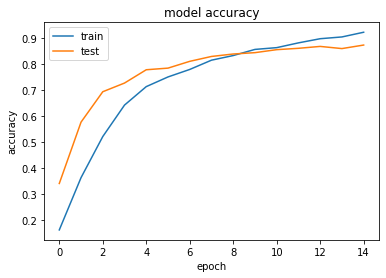

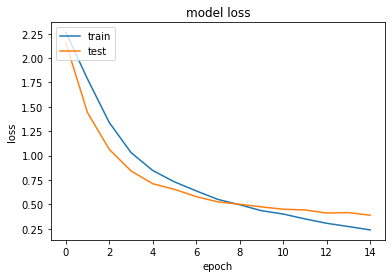

In [45]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
import random

Test=[]
c=0
for im in os.listdir("/content/test/test/"):
    if not 'jpg' in im:
      print(im)
    Test.append(im)
print(len(Test))

772


In [ ]:
os.remove('/content/test/test/.ipynb_checkpoints')

In [34]:
print(Test[0])

Spielzeug_22_08_yahoo.jpg


In [42]:
testing_data = []
for i in range(len(Test)):
    img_name = Test[i]
    print(img_name)
    img = cv2.imread("/content/test/test/"+img_name)
    #print(img)
    img = cv2.resize(img, (224,224))
    
    # check if it's grayscale
    if img.shape[2]==1:
        img = np.dstack([img, img, img]) #convert to 3 channels.
    
    # cv2 reads in BGR mode by default
    orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # normalize the image pixels
    orig_img = img.astype(np.float32)/255.
    testing_data.append(orig_img)
testing_data=np.array(testing_data)

Spielzeug_22_08_yahoo.jpg
indoor_0076.jpg
gimnasio_98_10_flickr.jpg
toys_store_06_15_altavista.jpg
airport_inside_0479.jpg
d03.jpg
surgery_room_08_03_altavista.jpg
kitchen077.jpg
restaurante_07_09_altavista.jpg
room_702.jpg
IMG_1698.jpg
giocattolo_52_03_flickr.jpg
int479.jpg
gym_21_01_altavista.jpg
indoor_0273.jpg
indoor_0176.jpg
N364057.jpg
mejor_panaderia_02_07_altavista.jpg
indoor_0422.jpg
airport_inside_0148.jpg
State_Room_Hi_Res_1.jpg
bakery_07_08_yahoo.jpg
room256.jpg
int622.jpg
restaurante_04_20_altavista.jpg
int734.jpg
003_1b.jpg
int418.jpg
airport_inside_0457.jpg
bakery.jpg
airport_inside_0140.jpg
indoor_0186.jpg
room_bistro2.jpg
operating_room_02_02_altavista.jpg
airport_inside_0049.jpg
roomscan40.jpg
restaurante_04_11_altavista.jpg
b6.jpg
restaurant_46_05_altavista.jpg
airport_inside_0525.jpg
airport_inside_0219.jpg
imagen003.jpg
airport_inside_0168.jpg
guyane_muscul.jpg
operating_room_01_08_altavista.jpg
restaurant_43_20_altavista.jpg
N190002.jpg
or-02-01-0746-27_l.jpg
airp

In [57]:
preds = model.predict(testing_data, batch_size=16)
preds = np.argmax(preds, axis=-1)

# Original labels
#orig_test_labels = np.argmax(test_labels, axis=-1)

#print(orig_test_labels.shape)
print(preds.shape)
print(preds)

(772,)
[9 5 6 9 0 2 8 5 8 2 2 9 2 4 5 2 5 1 5 0 8 1 8 2 8 8 7 5 0 1 0 2 8 6 0 5 8
 2 8 4 0 5 0 4 8 6 8 5 0 1 5 1 5 5 5 6 1 4 1 2 8 5 2 0 5 9 8 5 5 9 7 8 5 1
 2 8 0 0 5 1 0 5 7 8 7 4 1 9 8 9 1 9 5 2 0 5 1 8 9 1 7 5 5 5 5 2 2 8 9 5 2
 5 5 7 1 5 1 1 5 3 5 8 2 6 8 2 6 3 7 5 9 6 2 1 8 5 8 6 8 4 1 5 9 5 0 0 2 0
 8 1 9 0 5 8 0 2 5 5 0 2 4 8 9 2 8 2 2 5 0 0 0 0 0 1 3 4 2 2 5 5 0 8 1 2 5
 8 9 5 9 0 8 4 0 1 1 4 0 2 9 0 8 7 4 2 8 3 5 4 7 8 6 2 2 0 2 0 2 4 5 9 8 1
 5 8 5 1 8 1 2 9 5 9 1 0 6 0 9 2 8 1 2 1 0 2 5 2 1 2 1 1 7 0 8 4 7 0 8 0 2
 2 4 5 2 3 5 2 2 0 5 0 2 5 0 8 2 1 5 8 2 5 6 7 3 6 8 9 0 4 2 3 7 8 0 0 1 5
 0 3 1 1 6 9 5 6 0 5 5 9 5 1 5 5 2 4 5 0 3 5 0 4 5 8 9 5 0 9 9 5 1 2 2 5 9
 8 0 7 5 7 0 9 2 0 5 0 1 0 5 0 5 2 8 2 3 9 9 0 2 5 0 0 7 6 5 2 9 2 8 9 1 7
 2 8 0 2 5 6 8 5 0 8 1 5 6 9 2 0 7 2 5 0 5 9 0 8 9 8 2 2 8 9 5 1 5 5 5 2 0
 9 8 8 2 0 2 7 5 2 6 2 4 0 7 2 2 5 5 0 8 5 0 4 4 8 2 1 6 5 5 5 0 0 5 5 0 0
 2 5 2 2 1 0 0 6 8 1 0 2 5 6 3 4 4 8 5 3 2 4 1 8 0 0 2 8 0 0 1 1 5 2 8 2 5
 5 0 8 0 6 5 7 8 2

In [46]:
import cv2
# Fit the model
history = model.fit_generator(train_data_gen, epochs=5, steps_per_epoch=steps,
                               validation_data=(X_val,Y_val)) #save the best one

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
119/119 [==============================] - 33s 274ms/step - loss: 0.2104 - acc: 0.9317 - val_loss: 0.4358 - val_acc: 0.8651
Epoch 2/5
119/119 [==============================] - 32s 266ms/step - loss: 0.1967 - acc: 0.9357 - val_loss: 0.4055 - val_acc: 0.8692
Epoch 3/5
119/119 [==============================] - 32s 270ms/step - loss: 0.1730 - acc: 0.9467 - val_loss: 0.3801 - val_acc: 0.8745
Epoch 4/5
119/119 [==============================] - 32s 269ms/step - loss: 0.1464 - acc: 0.9527 - val_loss: 0.3890 - val_acc: 0.8734
Epoch 5/5
119/119 [==============================] - 32s 269ms/step - loss: 0.1378 - acc: 0.9530 - val_loss: 0.3592 - val_acc: 0.9006


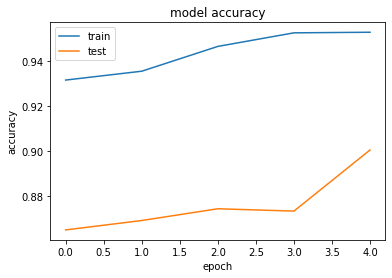

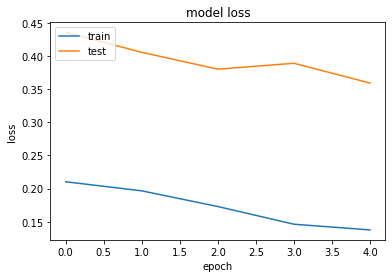

In [49]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
Ls=[]
for i in preds:
  Ls.append(i+1)

In [58]:
result=[]
for i in range(len(Test)):
    result.append([Test[i], Ls[i]])

Csv = pd.DataFrame(result)
Csv.to_csv("Result.csv")

In [ ]:
preds = ['4' if x==0 else x for x in preds]
preds = ['10' if x==1 else x for x in preds]
preds = ['9' if x==2 else x for x in preds]
preds = ['3' if x==3 else x for x in preds]
preds = ['1' if x==4 else x for x in preds]
preds = ['8' if x==5 else x for x in preds]
preds = ['6' if x==6 else x for x in preds]
preds = ['2' if x==7 else x for x in preds]
preds = ['7' if x==8 else x for x in preds]
preds = ['5' if x==9 else x for x in preds]

In [ ]:
preds = [int(x) for x in preds]

In [ ]:
print(preds)

[9, 8, 1, 3, 3, 6, 3, 2, 8, 3, 8, 3, 3, 5, 2, 10, 5, 10, 5, 9, 5, 3, 3, 5, 3, 9, 4, 10, 9, 2, 6, 3, 6, 10, 3, 8, 6, 1, 5, 10, 8, 9, 3, 10, 3, 3, 3, 3, 2, 10, 6, 2, 10, 6, 1, 7, 2, 9, 8, 3, 9, 10, 3, 6, 1, 6, 1, 6, 10, 3, 9, 6, 3, 9, 6, 4, 6, 1, 6, 1, 9, 1, 9, 6, 10, 3, 6, 3, 8, 9, 3, 6, 9, 1, 2, 5, 3, 10, 2, 8, 2, 6, 3, 9, 1, 6, 10, 3, 3, 1, 3, 1, 1, 10, 2, 6, 8, 2, 1, 6, 5, 2, 5, 3, 10, 10, 6, 10, 7, 6, 5, 1, 4, 1, 3, 3, 9, 1, 1, 10, 5, 9, 8, 6, 10, 10, 6, 6, 2, 4, 8, 2, 3, 8, 5, 10, 9, 2, 6, 3, 10, 1, 6, 1, 7, 1, 6, 10, 10, 8, 6, 6, 2, 8, 3, 3, 10, 3, 9, 3, 9, 4, 3, 4, 2, 1, 6, 7, 8, 4, 1, 10, 1, 6, 3, 8, 6, 2, 6, 3, 6, 3, 3, 2, 4, 9, 1, 10, 6, 6, 6, 6, 6, 6, 9, 4, 2, 6, 10, 3, 4, 9, 4, 7, 6, 6, 3, 8, 10, 7, 1, 9, 9, 3, 5, 4, 3, 4, 1, 2, 8, 9, 7, 10, 3, 5, 9, 3, 8, 6, 10, 7, 3, 8, 1, 10, 3, 9, 7, 6, 2, 6, 3, 4, 8, 1, 2, 6, 10, 10, 1, 9, 1, 5, 9, 8, 2, 10, 2, 3, 9, 3, 5, 3, 1, 6, 3, 10, 10, 10, 3, 2, 10, 2, 6, 2, 1, 9, 6, 2, 7, 3, 1, 3, 6, 2, 3, 6, 2, 1, 3, 1, 10, 3, 10, 9, 3, 9, 6, 1

In [ ]:
import shutil
shutil.make_archive('/content/drive/MyDrive/indoorTrain', 'zip', '/content/train')

'/content/drive/MyDrive/indoorTrain.zip'

In [60]:
import shutil
shutil.make_archive('/content/drive/MyDrive/IndoorScenes', 'zip', '/content/IndoorScenes')

'/content/drive/MyDrive/IndoorScenes.zip'